# Laboratorio #3
## Juan Camilo Chaparro Castellanos
### CC 1039466438


### 2) Analisis de pulsos de radar 

#### 2.1) pulso rectangular

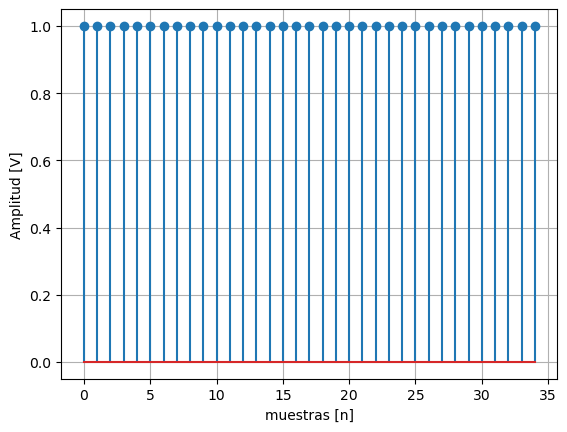

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#pulso
pulse= np.ones(35)
plt.stem(pulse)
plt.xlabel("muestras [n]")
plt.ylabel("Amplitud [V]")
plt.grid()

#### 2.2) grafico de la autocorrelacion del pulso

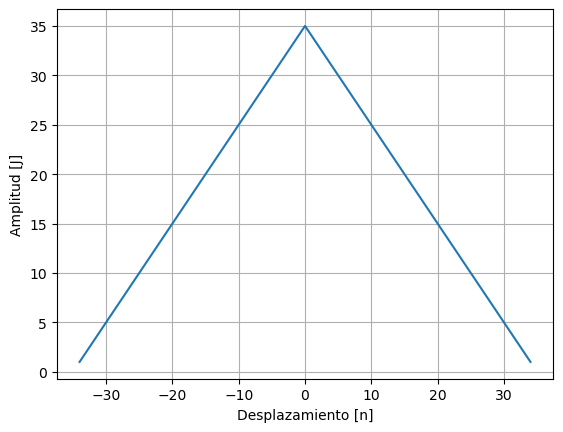

In [2]:
Rxx=np.correlate(pulse,pulse, mode='full')
tau=np.arange(-len(pulse)+1,len(pulse),1)
plt.plot(tau,Rxx)
plt.xlabel("Desplazamiento [n]")
plt.ylabel("Amplitud [J]")
plt.grid()

#### como puede observarse al ser dos pulsos con las mismas amplitud y muestras el comportamiento de estas forman una pendiente continua con magnitud 1 y en el Rxx(0) se muestra es el valor de la energia maxima de la señal donde se presenta la maxima similitud entre las señales

#### el parametro mode= "full" permite crear la correlacion desde que empiezan a solaparse las señales y cuando terminan de solaparse

#### 2.3) ruido introducido en el canal

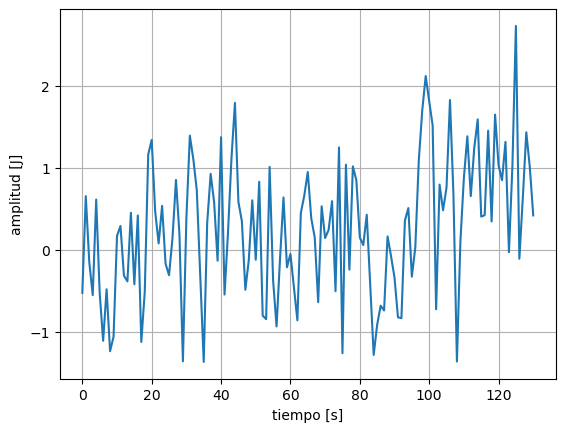

In [3]:
from utils import * #importamos toda las funciones del archivo utils

delayed_pulse=delay_noise(pulse) #generamos el pulso con ruido
times1=np.arange(float(len(delayed_pulse)))
plt.plot(times1,delayed_pulse)
plt.xlabel("tiempo [s]")
plt.ylabel("amplitud [J]")
plt.grid()
retraso=(len(delayed_pulse))-len(pulse)

In [4]:
print("restraso sufrido: {}s".format(retraso))

restraso sufrido: 96s


#### en la grafica anterior no se puede distinguir el pulso generado luego de ser transmitida la señal por el canal con ruido, ademas de estar sometida a un ruido por la cual genero distorcion en amplitud, tambien se genero un retraso significante en el tiempo de 76 segundos

#### 2.4) Correlacion de la señal transmitida respecto a la señal original

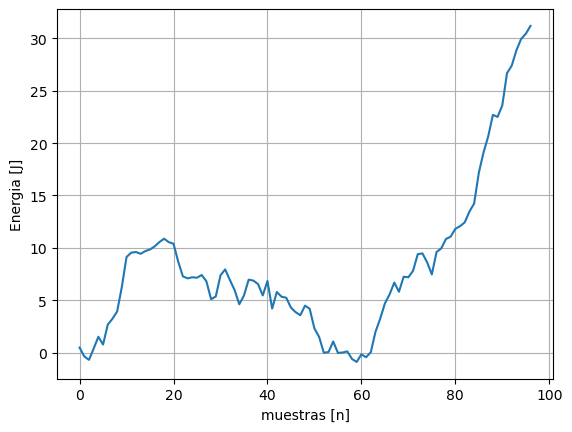

In [5]:
xcorr=np.correlate(delayed_pulse,pulse)
t1=np.arange(float(len(xcorr)))
plt.plot(t1,xcorr)
plt.xlabel("muestras [n]")
plt.ylabel("Energia [J]")
plt.grid()
plt.show()

In [6]:

print("el retraso que sufrio la señal con ruido es de: {}s respecto a la señal original".format(np.argmax(xcorr)-len(pulse)))

el retraso que sufrio la señal con ruido es de: 61s respecto a la señal original


In [7]:
print("valor maximo de similitud {}".format(np.max(xcorr)))

valor maximo de similitud 31.196365652662152


#### como se evidencia en la anterior grafica, no existe valores de correlacion alrrededor de los primeros 78 segundos ya que solo existe ruido en dicho tiempo, despues de estos es donde se puede encontrar la funcion original retrasada por la cual podemos encontrar la energia max de esta correlacion 

#### 3) Analisis de señales de marcha

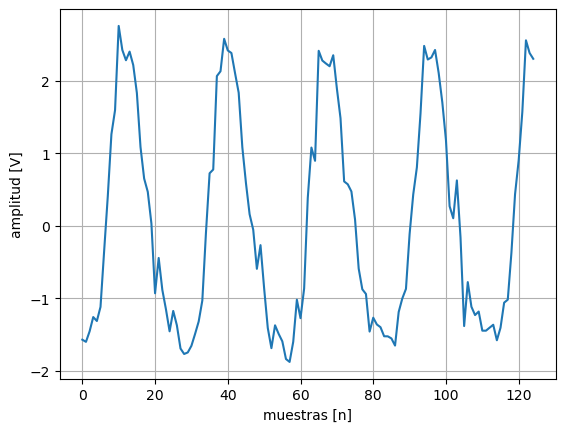

In [16]:
import pandas as pd
csvfile='gaitSignal.txt'
f = pd.read_csv(csvfile)
times2=np.arange(float(len(f)))
ft=f['RL_zgyro']

#grafica
plt.plot(times2,ft)
plt.ylabel("amplitud [V]")
plt.xlabel("muestras [n]")
plt.grid()

#### 3.1) normalizar la señal 

media: 0.052824176
valor maximo: 2.7554


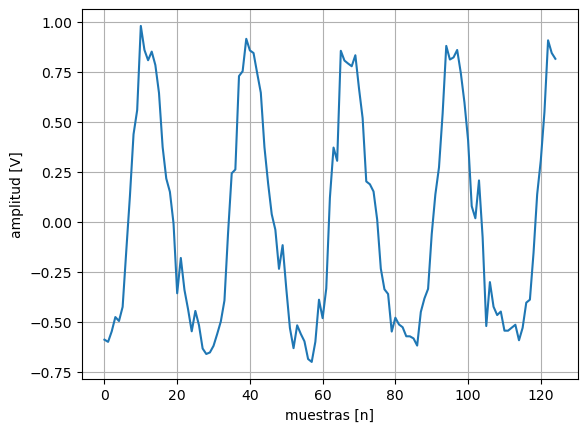

In [9]:
value_media=np.mean(ft) #calculo de la media de la señal
value_max=abs(np.max(ft))   #maximo valor de la señal en valor absoluto
ft_final=(ft-value_media)/value_max

times3=np.arange(float(len(ft_final))) # vector tiempo
plt.plot(times3,ft_final)
plt.ylabel("amplitud [V]")
plt.xlabel("muestras [n]")
plt.grid()
print("media: {}".format(value_media))
print("valor maximo: {}".format(value_max))

#### como se observa se pudo normalizar la señal y ademas al restar la media se esta eliminando el nivel DC de la señal

#### 3.2) periodo de la señal

In [17]:
print("periodo de la señal: {}s".format(1/35))

periodo de la señal: 0.02857142857142857s


#### 3.3) autocorrelacion

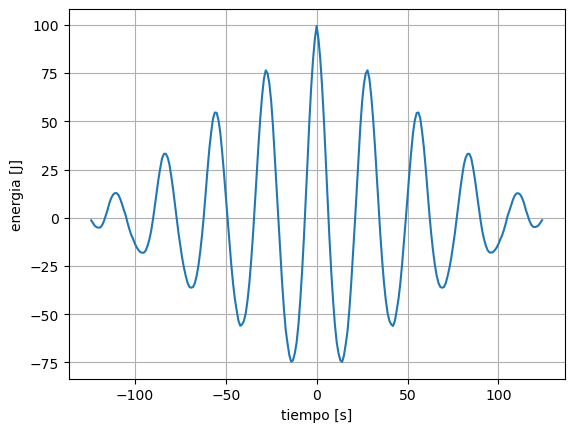

In [11]:
mi_autocorr=np.correlate(ft_final,ft,mode='full')
times4=np.arange(-len(ft)+1,len(ft))
plt.plot(times4,mi_autocorr)
plt.ylabel("energia [J]")
plt.xlabel("tiempo [s]")
plt.grid()

#### en esta figura se puede evidenciar que en el punto cero se muestra el maximo de energia, punto de maxima similitud y ademas muestra que la señal es simetrica, el cual se corrobora las propiedades de la autocorrelacion

#### los picos muestran: 
#### * el pico maximo es el punto de maxima similitud, que describe la energia de la señal
#### * los picos minimos muestras que la señales se encuentran en contra fase, su punto de maxima similitud con amplitudes inversas
#### * los picos maximos de forma desendente muestran que de a poco se esta teniendo una menor area de similitud entre las señales respetando la periodicidad de las señales

#### 3.4) zoom en 3 segundos

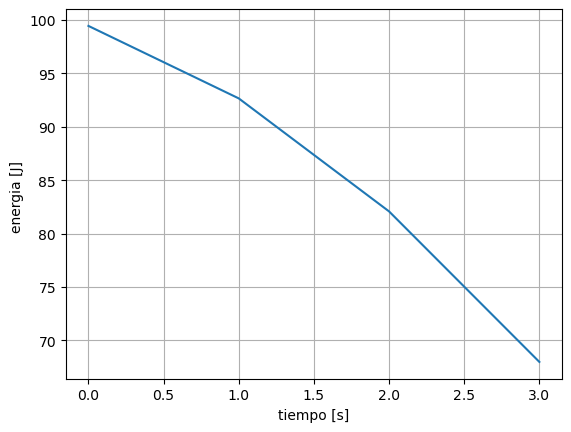

In [12]:
mu=3 #ventana de 3 segundos
zoom= mi_autocorr[int(len(mi_autocorr)/2):int((len(mi_autocorr)/2)+mu+1)]
times5=np.arange(float(len(zoom)))
plt.plot(times5,zoom)
plt.ylabel("energia [J] ")
plt.xlabel("tiempo [s]")
plt.grid()

#### en la anterior imagen se realiza un pequeño zoom en los primeros 3 segundos de la señal, de esta solo se puede concluir que el maximo de energia es en el tiempo cero (0)

### 3.2) Medicion del periodo de la señal
#### 3.2.1)

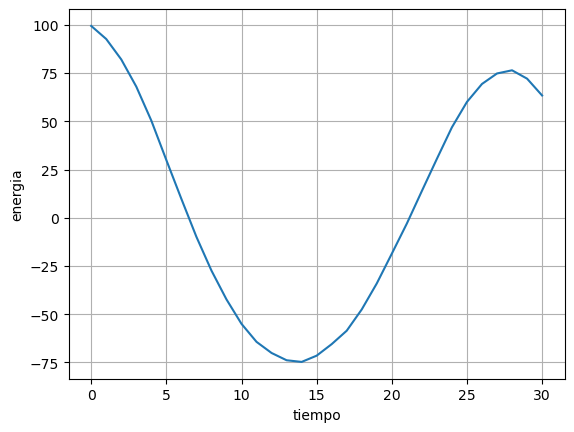

In [19]:
mu=30 #ventana de 30 segundos
zoom= mi_autocorr[int(len(mi_autocorr)/2):int((len(mi_autocorr)/2)+mu+1)]
times5=np.arange(float(len(zoom)))
plt.plot(times5,zoom)
plt.ylabel("energia")
plt.xlabel("tiempo")
plt.grid()

In [25]:
zoom[28]

76.44316700666042

#### se evidencia que el primer pico y/o primer maximo global de la autocorrelacion esta alrrededor de los 28 segundos, por lo que este describe el periodo de la señal 

#### 3.2.2)

#### al ser una funcion par el espectro de la señal se encuentra entre -120 y 120 por lo que solo se tomara en cuenta los valores temporales mayores a cero 

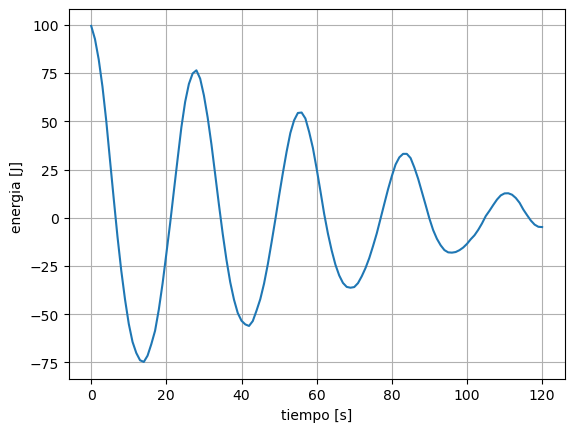

In [82]:
mu=120
zoom= mi_autocorr[int(len(mi_autocorr)/2):int((len(mi_autocorr)/2)+mu+1)]
times5=np.arange(float(len(zoom)))
plt.plot(times5,zoom)
plt.ylabel("energia [J] ")
plt.xlabel("tiempo [s]")
plt.grid()

#### 3.2.3)

In [83]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(zoom,height=5)
peaks

array([ 28,  56,  84, 111], dtype=int64)

In [92]:
#pico minimo luego del cero
min_value=min(mi_autocorr)
#posicion del pico minimo luego del cero
print("el minimo valor de la autorrelacion de la señal es: {}".format(min_value)+" en la posicion : {} seg".format(np.argmin(zoom[0:20])))

el minimo valor de la autorrelacion de la señal es: -74.73835319460002 en la posicion : 14 seg


#### 3.2.4)

In [89]:
print("el maximo pico global de la autorrelacion de la señal es: {}".format(mi_autocorr[152])+" en la posicion : {} seg".format(peaks[0]))

el maximo pico global de la autorrelacion de la señal es: 76.44316700666042 en la posicion : 28 seg


#### Conclusiones

#### * la correlacion es una herramienta eficiente para observar la similitud entre 2 señales
#### * Se muestra que la autocorrelacion es una herramienta muy utilizada en transmision de datos, donde se puede reconstruir una señal que fue transmitida por un canal que estuvo sometido a retrasos, atenuaciones, distoriciones, ruido gaussiano, entre otros aspectos
#### * se pudo evidenciar las propiedades de la correlacion en una funcion
#### * se corrobora que el valor maximo de similitud  y de energia es en origen, es decir en Rxx(0) siendo esta una de las propiedades de la corrrelacion
#### * la correlacion es una herramienta fundamental y aplicable en varios ambitos como procesos aleatorios, tratamiento de señales, en medicina y sus aplicaciones, etc.
#### * por medio de la correlacion se pueden evidenciar varios aspectos de una señal, como la periodicidad, fase, maximos, minimos